<a href="https://colab.research.google.com/github/Nisha40108/64060_Assignment1/blob/main/AML%20Assignment%201%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1641221/1641221 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 6s 167ms/step - loss: 0.5389 - accuracy: 0.7553 - val_loss: 0.4052 - val_accuracy: 0.8618
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.3241 - accuracy: 0.8953 - val_loss: 0.3113 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2419 - accuracy: 0.9187 - val_loss: 0.2859 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1969 - accuracy: 0.9345 - val_loss: 0.2775 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1632 - accuracy: 0.9479 - val_loss: 0.2823 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1410 - accuracy: 0.9556 - val_loss: 0.2835 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1200 - accuracy

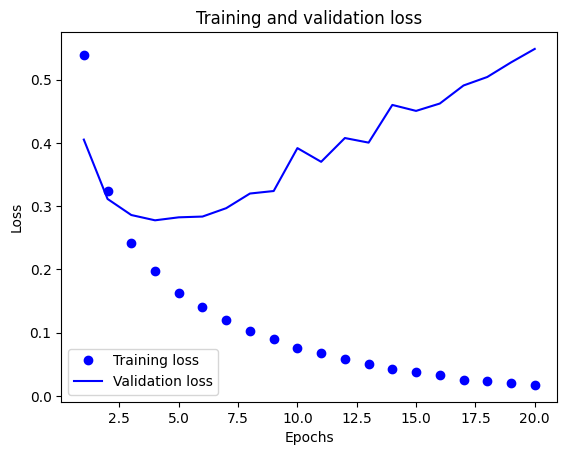

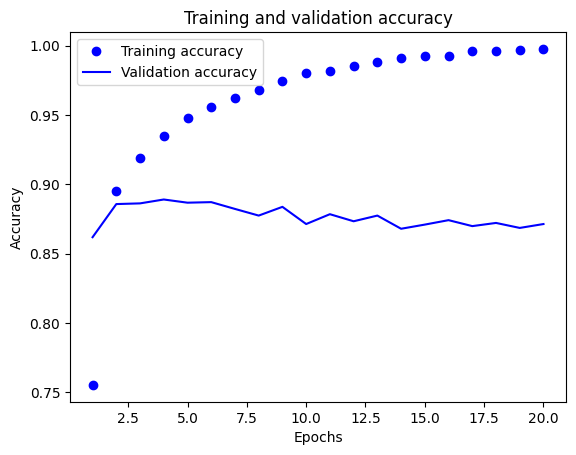

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4966 - accuracy: 0.8142
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2983 - accuracy: 0.8968
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2281 - accuracy: 0.9187
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2794 - accuracy: 0.8884


[0.27935653924942017, 0.8884400129318237]

In [2]:
#Advanced Machine Learning
#Assignment 1 - Neural Network - IMDB data set
#Name: Nisha Chaurasia
#Date: 09-21-2023

#Using the IMDB data set from the library tensorflow.keras.dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

In [ ]:
#Decoding Reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
#The dataset is vectorized here by Create an all-zero matrix of shape (len(sequences), dimension)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [ ]:
#Vectorised Train & Test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
#Building Model using Relu function
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [ ]:
#Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [ ]:

#Validating your approach : Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
#Training the model with batch size 512 and 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

In [ ]:
#Plotting graph between Training and Validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#Training the model from scratch - Model 1 Using epoches 4
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

In [ ]:

results

In [ ]:
#Using a train model to genereate prediction on new data
model.predict(x_test)

In [ ]:
#Training the model 2 using epoches 5
model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(x_train, y_train, epochs=5, batch_size=512)
results = model_2.evaluate(x_test, y_test)

In [ ]:
results

In [ ]:
#1:Above used two hidden layers. Now using three hidden layers to see how doing so affects validation and test accuracy
#Model 1.1 Trained with 3 layers
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

In [ ]:
#Plotting graph between Training and Validation loss
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Plotting graph between Training and Validation accuracyplt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_11.fit(x_train, y_train, epochs=12, batch_size=512)
results_M11 = model.evaluate(x_test, y_test)
results_M11

In [ ]:
#Model 1.2 Trained with 1 layers
model_12 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_12.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history4 = model_12.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict4 = history4.history
history_dict4.keys()

In [ ]:
#Plotting graph between Training and Validation loss
loss_values = history_dict4["loss"]
val_loss_values = history_dict4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Plotting graph between Training and Validation accuracyplt.clf()
acc = history_dict4["accuracy"]
val_acc = history_dict4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_12.fit(x_train, y_train, epochs=12, batch_size=512)
results_M12 = model.evaluate(x_test, y_test)
results_M12

In [ ]:
#2 Using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
#Training the model with 32-Units
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict21 = history21.history
history_dict21.keys()


In [ ]:
#Plotting graph between Training and Validation loss
loss_values = history_dict21["loss"]
val_loss_values = history_dict21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Plotting graph between Training and Validation accuracy
plt.clf()
acc = history_dict21["accuracy"]
val_acc = history_dict21["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_21.fit(x_train, y_train, epochs=8, batch_size=512)
results_M21 = model_21.evaluate(x_test, y_test)
results_M21

In [ ]:
#Training the model with 64-Units
model_22 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_22.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history22 = model_22.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict22 = history22.history
history_dict22.keys()

In [ ]:
#Plotting graph between Training and Validation loss
loss_values = history_dict22["loss"]
val_loss_values = history_dict22["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Plotting graph between Training and Validation accuracy
plt.clf()
acc = history_dict22["accuracy"]
val_acc = history_dict22["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_22.fit(x_train, y_train, epochs=8, batch_size=512)
results_M22 = model_22.evaluate(x_test, y_test)
results_M22

In [ ]:
#Training the model with 128-Units
model_23 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_23.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history23 = model_23.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict23 = history23.history
history_dict23.keys()

In [ ]:
#Plotting graph between Training and Validation loss
loss_values = history_dict23["loss"]
val_loss_values = history_dict23["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Plotting graph between Training and Validation accuracy
plt.clf()
acc = history_dict23["accuracy"]
val_acc = history_dict23["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_23.fit(x_train, y_train, epochs=8, batch_size=512)
results_M23 = model_23.evaluate(x_test, y_test)
results_M23

In [ ]:
#3: Using the mse loss function instead of binary_crossentropy
#Loss Function
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

In [ ]:
#Plotting graph between Training and Validation loss
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Plotting graph between Training and Validation accuracy
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

In [ ]:
#4:Using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu
#Training the model using Tanh Activation Function
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

In [ ]:
#Plotting graph between Training and Validation loss
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Plotting graph between Training and Validation accuracy
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

In [ ]:
#5:Using regularization, dropout,etc technique we studied in class to get the model perform better on validation
#i) Regularization : Using L2 regularization (also known as weight decay)
model_regularisation = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularisation.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_regularisation = model_regularisation.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularisation = history_model_regularisation.history
history_dict_regularisation.keys()

In [ ]:
#Plotting graph between Training and Validation loss
loss_values = history_dict_regularisation["loss"]
val_loss_values = history_dict_regularisation["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Plotting graph between Training and Validation accuracy
plt.clf()
acc = history_dict_regularisation["accuracy"]
val_acc = history_dict_regularisation["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_regularisation.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularisation = model_regularisation.evaluate(x_test, y_test)
results_regularisation

In [ ]:
#ii) dropout: layers.Dropout(0.5)
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

In [ ]:
#Plotting graph between Training and Validation loss
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Plotting graph between Training and Validation accuracy
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

In [ ]:
#Training the model with Hypertunned Parameters mentioned above
from tensorflow.keras import regularizers
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

In [ ]:
#Plotting graph between Training and Validation loss
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Plotting graph between Training and Validation accuracy
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

In [ ]:
#Summary of all models
All_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularisation[0],results_tanh[0]])*100
All_Loss
All_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularisation[1],results_tanh[1]])*100
All_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularisation','model_tanh']

plt.clf()

In [ ]:
#Comparing all models using graph
fig, ax = plt.subplots()
ax.scatter(All_Loss,All_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()